In [171]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

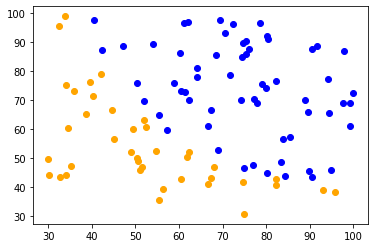

In [172]:
#Reading and visualization
file = pd.read_csv("data1.csv")
file = file.to_numpy()

def print_scatter(file):
    positive_mask = file[:, -1] == 1
    negative_mask = file[:, -1] == 0
    positives = file[positive_mask, :]
    negatives = file[negative_mask, :]
    plt.scatter(positives[:, 0], positives[:, 1], color='blue')
    plt.scatter(negatives[:, 0], negatives[:, 1], color="orange")
    
print_scatter(file)

In [173]:
X = file[:, :-1]
Y = file[:, [-1]]

In [174]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

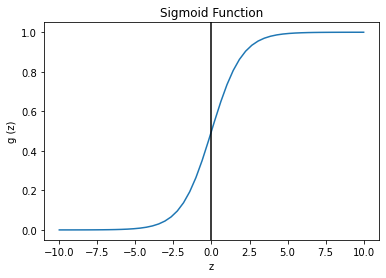

In [175]:
x_demo = np.linspace(-10, 10)
y_demo = sigmoid(x_demo)
plt.plot(x_demo, y_demo)
plt.axvline(color='black')
plt.title("Sigmoid Function")
plt.xlabel('z')
plt.ylabel("g (z)")
plt.show()

In [176]:
def stick_column_with_one(X):
    n = X.shape[0]
    ones = np.ones((n, 1))
    return np.hstack((ones, X))

In [177]:
# The gradient descent function for logistic regression
# Remember, as you can see the pattern here, this function can be generalized to take a prediction function!
# Thank you SICP
def gradient_descent(X, Y, learning_rate, num_iters):
    # normalizing the input and formatting
    x_min = X.min(axis=0, keepdims=True)
    x_max = X.max(axis=0, keepdims=True)
    x_calc = (X - x_min) / (x_max - x_min)
    x_calc = stick_column_with_one(x_calc)

    n, d = x_calc.shape
    theta = np.zeros((d, 1))

    for i in range(num_iters):
        prediction = sigmoid(np.matmul(x_calc, theta))
        error = Y - prediction
        theta += (learning_rate) * np.matmul(np.transpose(x_calc), error)


    def predict(x_predict, params):
        if (params):
            return theta
        # normalize
        x_c = (x_predict - x_min) / (x_max - x_min)
        x_c = stick_column_with_one(x_c)
        our_prediction = sigmoid(np.matmul(x_c, theta))
        return np.where(our_prediction >= 0, 1, 0)

    return predict

In [178]:
predictor = gradient_descent(X, Y, 0.1, 50000)

In [179]:
def plotDecisionBoundary2d(thetas):
    theta_dim = np.shape(thetas)[0]
    x_coeffs = thetas[:theta_dim-1]
    y_coeff = thetas[theta_dim-1][0]
    rows_xs = np.arange(0, 1, 0.01)
    n = np.size(rows_xs)
    xs = np.linspace(rows_xs, rows_xs, 1)
    xs = np.transpose(xs)
    
    for i in range(2, theta_dim-1):
        xs = np.append(xs, xs[:, 0] ** i, axis=1)
    
    ones = np.ones((n, 1))
    xs = np.hstack((ones, xs))
    ys = (np.matmul(xs, x_coeffs))/(-y_coeff)
    
    plt.plot(xs[:, 1], ys, color='green')
    print_scatter(file / file.max(axis=0))
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.title("Gradient Descent Prediction")
    plt.show()

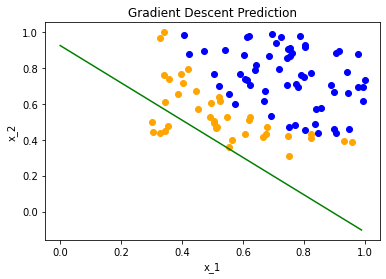

In [180]:
plotDecisionBoundary2d(predictor(0, True))

The original data also had to be normalized for the plot of separation line